### 데이터 불러오기, split, scaling

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape)

from sklearn.model_selection import train_test_split
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.25, random_state = 42)
print(len(x_train), len(x_val), len(x_test))

import numpy as np
train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)



# Normalize training set using train mean and std
X_train = (x_train - train_mean) / train_std

# Normalize validation set using train mean and std
X_val = (x_val - train_mean) / train_std
# X_val = (x_val - val_mean) / val_std
# Normalize test set using train mean and std
X_test = (x_test - train_mean) / train_std


(569, 30)
341 114 114


### batch gradient descent사용

# 출력층에서의 오차
dz3 = a3 - yi  # Cross Entropy에서의 Gradient
dw3 = np.dot(a2.T, dz3) / m + (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
db3 = np.sum(dz3) / m

# 두 번째 은닉층에서의 오차
da2 = np.dot(dz3, self.w3.T)
dz2 = da2 * self.a2 * (1 - self.a2)  # sigmoid 함수의 미분 적용
dw2 = np.dot(a1.T, dz2) / m + (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
db2 = np.sum(dz2, axis=0) / m

# 첫 번째 은닉층에서의 오차
da1 = np.dot(dz2, self.w2.T)
dz1 = da1 * self.a1 * (1 - self.a1)  # sigmoid 함수의 미분 적용
dw1 = np.dot(x.T, dz1) / m + (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
db1 = np.sum(dz1, axis=0) / m

# 가중치 업데이트
self.w1 -= self.lr * dw1
self.b1 -= self.lr * db1
self.w2 -= self.lr * dw2
self.b2 -= self.lr * db2
self.w3 -= self.lr * dw3
self.b3 -= self.lr * db3


In [15]:
import numpy as np

class MultiLayer:

    def __init__(self, hidden_units1=10, hidden_units2=5, hidden_units3 = 3,learning_rate=0.1, l1=0, l2=0):
        self.hidden_units1 = hidden_units1  # 첫 번째 은닉층의 뉴런 개수
        self.hidden_units2 = hidden_units2
        self.hidden_units3 = hidden_units3 # 두 번째 은닉층의 뉴런 개수
        self.w1 = None    # 첫 번째 은닉층 가중치
        self.b1 = None    # 첫 번째 은닉층 절편
        self.w2 = None    # 두 번째 은닉층 가중치
        self.b2 = None    # 두 번째 은닉층 절편
        self.w3 = None    # 세 번째 은닉층 가중치
        self.b3 = None    # 세 번째 은닉층 절편
        self.w4 = None    # 출력층 가중치
        self.b4 = None    # 출력층 절편
        self.a1 = None    # 첫 번째 은닉층 활성화 값
        self.a2 = None    # 두 번째 은닉층 활성화 값
        self.a3 = None    # 세 번째 은닉층 활성화 값
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        self.losses = []       # 에포크별 훈련 손실 저장 리스트
        self.val_losses = []   # 에포크별 검증 손실 저장 리스트

    def forpass(self, x):
        # 첫 번째 은닉층
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        # 두 번째 은닉층
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.activation(z2)
        # 세 번째 은닉층
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = self.activation(z3)
        # 출력층
        z4 = np.dot(self.a3, self.w4) + self.b4
        return z4

    def backprop(self, x, err):
        m = len(x)
        #출력층에 대한 그래디언트
        w4_grad = np.dot(self.a3.T, err) / m
        b4_grad = np.sum(err) / m
        # 세 번째층에 대한 그래디언트
        err_hidden3 = np.dot(err, self.w4.T) * self.a3 * (1 - self.a3)
        w3_grad = np.dot(self.a2.T, err_hidden3) / m
        b3_grad = np.sum(err_hidden3, axis = 0) / m
        # 두 번째 은닉층에 대한 그래디언트
        err_hidden2 = np.dot(err_hidden3, self.w3.T) * self.a2 * (1 - self.a2)
        w2_grad = np.dot(self.a1.T, err_hidden2) / m
        b2_grad = np.sum(err_hidden2, axis=0) / m
        # 첫 번째 은닉층에 대한 그래디언트
        err_hidden1 = np.dot(err_hidden2, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_hidden1) / m
        b1_grad = np.sum(err_hidden1, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad, w4_grad, b4_grad

    def init_weights(self, n_features):
        # 가중치와 절편 초기화
        self.w1 = np.random.randn(n_features, self.hidden_units1) * 0.01
        self.b1 = np.zeros(self.hidden_units1)
        self.w2 = np.random.randn(self.hidden_units1, self.hidden_units2) * 0.01
        self.b2 = np.zeros(self.hidden_units2)
        self.w3 = np.random.randn(self.hidden_units2, self.hidden_units3) * 0.01
        self.b3 = np.zeros(self.hidden_units3)
        self.w4 = np.random.randn(self.hidden_units3, 1) * 0.01
        self.b4 = 0

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)
        self.init_weights(x.shape[1])
        for i in range(epochs):
            indices = np.random.permutation(m)  # 데이터 셔플
            for idx in indices:  # 각 데이터 포인트마다 학습
                xi = x[idx:idx+1]
                yi = y[idx:idx+1]
                a = self.training(xi, yi, 1)  # 한 샘플에 대해 학습
            # 손실 계산
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
            self.losses.append((loss + self.reg_loss()) / m)
            self.update_val_loss(x_val, y_val)

    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad, w4_grad, b4_grad = self.backprop(x, err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        w3_grad += (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
        w4_grad += (self.l1 * np.sign(self.w4) + self.l2 * self.w4) / m
        # 가중치 업데이트
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        self.w3 -= self.lr * w3_grad
        self.b3 -= self.lr * b3_grad
        self.w4 -= self.lr * w4_grad
        self.b4 -= self.lr * b4_grad
        return a

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2)) + np.sum(np.abs(self.w3))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2) + np.sum(self.w3**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-(y_val * np.log(a) + (1 - y_val) * np.log(1 - a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))  # 검증 손실 저장

    ### predict 함수 추가
    def predict(self, X):
        # forpass 함수를 사용하여 예측값 계산
        predictions = self.forpass(X)
        # 0.5를 기준으로 0 또는 1로 분류
        return (self.activation(predictions) > 0.5).astype(int)

    ### score 함수 추가
    def score(self, X, y):
        # predict 함수를 사용하여 예측
        predictions = self.predict(X)
        # 예측값과 실제 타겟 값 비교하여 정확도 계산
        accuracy = np.mean(predictions == y.reshape(-1, 1))
        return accuracy


In [16]:
# 학습이 완료된 모델을 사용하여 테스트 세트에 대한 정확도 계산
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
model = MultiLayer(hidden_units1=16, hidden_units2=32, hidden_units3 = 10,learning_rate=0.01,l2=0.01)

# 모델 학습
model.fit(X_train, y_train, epochs=100, x_val=X_val, y_val=y_val)
accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy}")


Test set accuracy: 0.631578947368421


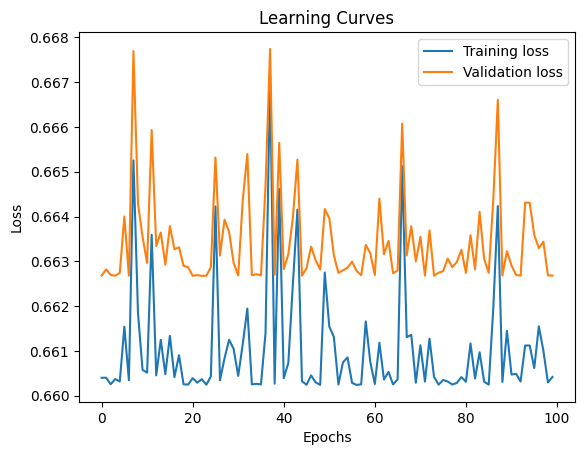

In [17]:
import matplotlib.pyplot as plt

# 학습 손실과 검증 손실 플롯
plt.plot(model.losses, label='Training loss')
plt.plot(model.val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.show()


### 종합 정리
은닉층 뉴런 수 증가: 모델의 표현력을 높이기 위해 뉴런 수를 늘려보세요.
학습률 감소: 학습률을 줄여 모델이 더 세밀하게 학습하도록 합니다.
에포크 증가: 충분히 학습할 수 있도록 더 많은 에포크를 사용합니다.
정규화 추가: L2 정규화를 도입해 과적합을 방지할 수 있습니다.
데이터 스케일링: 데이터를 스케일링해서 학습이 원활하게 이루어지도록 합니다.

### mean loss

In [ ]:
# Test set에서 예측값 계산
predictions = model.forpass(X_test)

# 예측값을 Sigmoid 활성화 함수를 사용해 0~1 사이 값으로 변환
predictions = 1 / (1 + np.exp(-predictions))  # Sigmoid 적용

# Cross-Entropy Loss 계산
y_test_reshaped = y_test.reshape(-1, 1)
epsilon = 1e-10  # 로그 계산 시 overflow 방지용 작은 값
loss = -(y_test_reshaped * np.log(predictions + epsilon) + (1 - y_test_reshaped) * np.log(1 - predictions + epsilon))

# 전체 Test Set에 대한 Mean Loss 계산
mean_loss = np.mean(loss)
print(f"Test set mean loss: {mean_loss}")

Test set mean loss: 0.6587431599589696


### early stopping 할 수 잇음


In [ ]:
def fit(self, x, y, epochs=100, x_val=None, y_val=None, patience=10):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    m = len(x)

    # 가중치 초기화
    self.init_weights(x.shape[1])

    # Early stopping을 위한 변수 초기화
    best_val_loss = float('inf')  # 가장 낮은 검증 손실값을 저장할 변수
    patience_counter = 0          # patience 횟수를 세는 변수

    for i in range(epochs):
        a = self.training(x, y, m)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
        self.losses.append((loss + self.reg_loss()) / m)  # 훈련 손실 저장
        self.update_val_loss(x_val, y_val)  # 검증 손실 업데이트

        # Early Stopping 검증 로직
        current_val_loss = self.val_losses[-1]  # 현재 검증 손실

        if current_val_loss < best_val_loss:
            best_val_loss = current_val_loss  # 가장 낮은 검증 손실 갱신
            patience_counter = 0  # patience 카운터 초기화
        else:
            patience_counter += 1  # 개선이 없으면 카운터 증가

        if patience_counter >= patience:
            print(f"Early stopping at epoch {i+1}")
            break  # patience 초과 시 학습 중단


In [ ]:
model.fit(X_train, y_train, epochs=1000, x_val=X_val, y_val=y_val, patience=10)

### stohastic gradient method 사용

# 출력층에서의 오차
dz3 = a3 - yi  # Cross Entropy에서의 Gradient
dw3 = np.dot(a2.T, dz3) / m + (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
db3 = np.sum(dz3) / m

# 두 번째 은닉층에서의 오차
da2 = np.dot(dz3, self.w3.T)
dz2 = da2 * self.a2 * (1 - self.a2)  # sigmoid 함수의 미분 적용
dw2 = np.dot(a1.T, dz2) / m + (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
db2 = np.sum(dz2, axis=0) / m

# 첫 번째 은닉층에서의 오차
da1 = np.dot(dz2, self.w2.T)
dz1 = da1 * self.a1 * (1 - self.a1)  # sigmoid 함수의 미분 적용
dw1 = np.dot(x.T, dz1) / m + (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
db1 = np.sum(dz1, axis=0) / m

# 가중치 업데이트
self.w1 -= self.lr * dw1
self.b1 -= self.lr * db1
self.w2 -= self.lr * dw2
self.b2 -= self.lr * db2
self.w3 -= self.lr * dw3
self.b3 -= self.lr * db3


In [ ]:
import numpy as np

class MultiLayer2:

    def __init__(self, hidden_units1=10, hidden_units2=5, hidden_unit=5, learning_rate=0.1, l1=0, l2=0):
        self.hidden_units1 = hidden_units1  # 첫 번째 은닉층의 뉴런 개수
        self.hidden_units2 = hidden_units2  # 두 번째 은닉층의 뉴런 개수
        self.hidden_units3 = hidden_units3  # 세 번째 은닉층의 뉴런 개수
        self.w1 = None    # 첫 번째 은닉층 가중치
        self.b1 = None    # 첫 번째 은닉층 절편
        self.w2 = None    # 두 번째 은닉층 가중치
        self.b2 = None    # 두 번째 은닉층 절편
        self.w3 = None    # 첫 번째 은닉
        self.w3 = None    # 출력층 가중치
        self.b3 = None    # 출력층 절편
        self.a1 = None    # 첫 번째 은닉층 활성화 값
        self.a2 = None    # 두 번째 은닉층 활성화 값
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        self.losses = []       # 에포크별 훈련 손실 저장 리스트
        self.val_losses = []   # 에포크별 검증 손실 저장 리스트

    def forpass(self, x):
        # 첫 번째 은닉층
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        # 두 번째 은닉층
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.activation(z2)
        # 출력층
        z3 = np.dot(self.a2, self.w3) + self.b3
        return z3

    def backprop(self, x, err):
        m = len(x)
        # 출력층에 대한 그래디언트
        w3_grad = np.dot(self.a2.T, err) / m
        b3_grad = np.sum(err) / m
        # 두 번째 은닉층에 대한 그래디언트
        err_hidden2 = np.dot(err, self.w3.T) * self.a2 * (1 - self.a2)
        w2_grad = np.dot(self.a1.T, err_hidden2) / m
        b2_grad = np.sum(err_hidden2, axis=0) / m
        # 첫 번째 은닉층에 대한 그래디언트
        err_hidden1 = np.dot(err_hidden2, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_hidden1) / m
        b1_grad = np.sum(err_hidden1, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad

    def init_weights(self, n_features):
        # 가중치와 절편 초기화
        self.w1 = np.random.randn(n_features, self.hidden_units1) * 0.01
        self.b1 = np.zeros(self.hidden_units1)
        self.w2 = np.random.randn(self.hidden_units1, self.hidden_units2) * 0.01
        self.b2 = np.zeros(self.hidden_units2)
        self.w3 = np.random.randn(self.hidden_units2, 1) * 0.01
        self.b3 = 0
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)
        self.init_weights(x.shape[1])
        for i in range(epochs):
            indices = np.random.permutation(m)  # 데이터 셔플
            for idx in indices:  # 각 데이터 포인트마다 학습
                xi = x[idx:idx+1]
                yi = y[idx:idx+1]
                a = self.training(xi, yi, 1)  # 한 샘플에 대해 학습
            # 손실 계산
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
            self.losses.append((loss + self.reg_loss()) / m)
            self.update_val_loss(x_val, y_val)



    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad = self.backprop(x, err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        w3_grad += (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
        # 가중치 업데이트
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        self.w3 -= self.lr * w3_grad
        self.b3 -= self.lr * b3_grad
        return a

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2)) + np.sum(np.abs(self.w3))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2) + np.sum(self.w3**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-(y_val * np.log(a) + (1 - y_val) * np.log(1 - a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))  # 검증 손실 저장

    ### predict 함수 추가
    def predict(self, X):
        # forpass 함수를 사용하여 예측값 계산
        predictions = self.forpass(X)
        # 0.5를 기준으로 0 또는 1로 분류
        return (self.activation(predictions) > 0.5).astype(int)

    ### score 함수 추가
    def score(self, X, y):
        # predict 함수를 사용하여 예측
        predictions = self.predict(X)
        # 예측값과 실제 타겟 값 비교하여 정확도 계산
        accuracy = np.mean(predictions == y.reshape(-1, 1))
        return accuracy


In [ ]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
model2 = MultiLayer2(hidden_units1=10, hidden_units2=10, learning_rate=0.01,l2=0.1)

# 모델 학습
model2.fit(X_train, y_train, epochs=100, x_val=X_val, y_val=y_val)
accuracy = model2.score(X_test, y_test)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.631578947368421


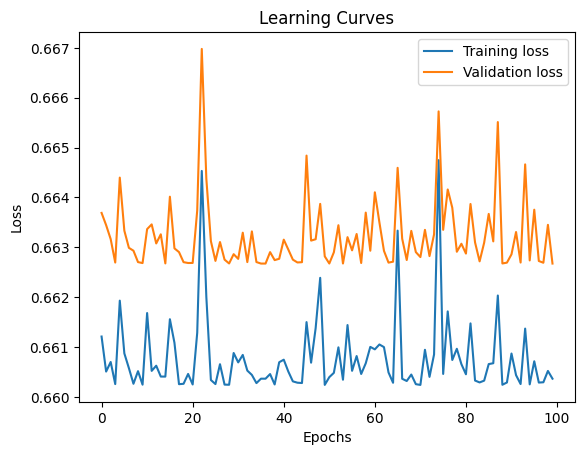

In [ ]:
import matplotlib.pyplot as plt

# 학습 손실과 검증 손실 플롯
plt.plot(model2.losses, label='Training loss')
plt.plot(model2.val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.show()


### mini batch gradient descent사용

# 출력층에서의 오차
dz3 = a3 - yi  # Cross Entropy에서의 Gradient
dw3 = np.dot(a2.T, dz3) / m + (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
db3 = np.sum(dz3) / m

# 두 번째 은닉층에서의 오차
da2 = np.dot(dz3, self.w3.T)
dz2 = da2 * self.a2 * (1 - self.a2)  # sigmoid 함수의 미분 적용
dw2 = np.dot(a1.T, dz2) / m + (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
db2 = np.sum(dz2, axis=0) / m

# 첫 번째 은닉층에서의 오차
da1 = np.dot(dz2, self.w2.T)
dz1 = da1 * self.a1 * (1 - self.a1)  # sigmoid 함수의 미분 적용
dw1 = np.dot(x.T, dz1) / m + (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
db1 = np.sum(dz1, axis=0) / m

# 가중치 업데이트
self.w1 -= self.lr * dw1
self.b1 -= self.lr * db1
self.w2 -= self.lr * dw2
self.b2 -= self.lr * db2
self.w3 -= self.lr * dw3
self.b3 -= self.lr * db3


In [ ]:
import numpy as np

class MultiLayer3:

    def __init__(self, hidden_units1=10, hidden_units2=5, learning_rate=0.1, l1=0, l2=0):
        self.hidden_units1 = hidden_units1  # 첫 번째 은닉층의 뉴런 개수
        self.hidden_units2 = hidden_units2  # 두 번째 은닉층의 뉴런 개수
        self.w1 = None    # 첫 번째 은닉층 가중치
        self.b1 = None    # 첫 번째 은닉층 절편
        self.w2 = None    # 두 번째 은닉층 가중치
        self.b2 = None    # 두 번째 은닉층 절편
        self.w3 = None    # 출력층 가중치
        self.b3 = None    # 출력층 절편
        self.a1 = None    # 첫 번째 은닉층 활성화 값
        self.a2 = None    # 두 번째 은닉층 활성화 값
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        self.losses = []       # 에포크별 훈련 손실 저장 리스트
        self.val_losses = []   # 에포크별 검증 손실 저장 리스트

    def forpass(self, x):
        # 첫 번째 은닉층
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        # 두 번째 은닉층
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.activation(z2)
        # 출력층
        z3 = np.dot(self.a2, self.w3) + self.b3
        return z3

    def backprop(self, x, err):
        m = len(x)
        # 출력층에 대한 그래디언트
        w3_grad = np.dot(self.a2.T, err) / m
        b3_grad = np.sum(err) / m
        # 두 번째 은닉층에 대한 그래디언트
        err_hidden2 = np.dot(err, self.w3.T) * self.a2 * (1 - self.a2)
        w2_grad = np.dot(self.a1.T, err_hidden2) / m
        b2_grad = np.sum(err_hidden2, axis=0) / m
        # 첫 번째 은닉층에 대한 그래디언트
        err_hidden1 = np.dot(err_hidden2, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_hidden1) / m
        b1_grad = np.sum(err_hidden1, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad

    def init_weights(self, n_features):
        # 가중치와 절편 초기화
        self.w1 = np.random.randn(n_features, self.hidden_units1) * 0.01
        self.b1 = np.zeros(self.hidden_units1)
        self.w2 = np.random.randn(self.hidden_units1, self.hidden_units2) * 0.01
        self.b2 = np.zeros(self.hidden_units2)
        self.w3 = np.random.randn(self.hidden_units2, 1) * 0.01
        self.b3 = 0
    def fit(self, x, y, epochs=100, batch_size=10, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        if x_val is not None and y_val is not None:
            y_val = y_val.reshape(-1, 1)

        m = len(x)
        self.init_weights(x.shape[1])

        for i in range(epochs):
            indices = np.random.permutation(m)  # 데이터를 셔플
            batch_losses = []  # 배치별 손실을 저장할 리스트

            for start_idx in range(0, m, batch_size):  # 각 배치마다 학습
                end_idx = start_idx + batch_size
                xi = x[indices[start_idx:end_idx]]
                yi = y[indices[start_idx:end_idx]]

                # 미니 배치 학습
                a = self.training(xi, yi, batch_size)

                # 손실 계산
                a = np.clip(a, 1e-10, 1-1e-10)  # 예측값을 0~1로 제한하여 계산 오류 방지
                batch_loss = np.sum(-(yi * np.log(a) + (1 - yi) * np.log(1 - a)))  # 배치 손실 계산
                batch_losses.append(batch_loss)  # 배치 손실을 저장

            # 배치별 손실의 평균을 계산하고 저장
            epoch_loss = np.mean(batch_losses) / batch_size
            self.losses.append((epoch_loss + self.reg_loss()) / m)

            # 검증 손실 업데이트 (x_val과 y_val이 제공된 경우에만)
            if x_val is not None and y_val is not None:
                self.update_val_loss(x_val, y_val)





    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad, w3_grad, b3_grad = self.backprop(x, err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        w3_grad += (self.l1 * np.sign(self.w3) + self.l2 * self.w3) / m
        # 가중치 업데이트
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        self.w3 -= self.lr * w3_grad
        self.b3 -= self.lr * b3_grad
        return a

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2)) + np.sum(np.abs(self.w3))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2) + np.sum(self.w3**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-(y_val * np.log(a) + (1 - y_val) * np.log(1 - a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))  # 검증 손실 저장

    ### predict 함수 추가
    def predict(self, X):
        # forpass 함수를 사용하여 예측값 계산
        predictions = self.forpass(X)
        # 0.5를 기준으로 0 또는 1로 분류
        return (self.activation(predictions) > 0.5).astype(int)

    ### score 함수 추가
    def score(self, X, y):
        # predict 함수를 사용하여 예측
        predictions = self.predict(X)
        # 예측값과 실제 타겟 값 비교하여 정확도 계산
        accuracy = np.mean(predictions == y.reshape(-1, 1))
        return accuracy


In [ ]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
model3 = MultiLayer3(hidden_units1=16, hidden_units2=32, learning_rate=0.001,l2=0)

# 모델 학습
model3.fit(X_train, y_train, epochs=1000, x_val=X_val, y_val=y_val)
accuracy = model3.score(X_test, y_test)
print(f"Test set accuracy: {accuracy}")

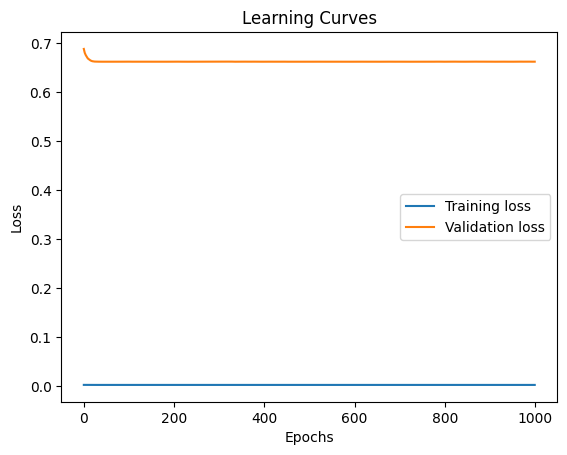

In [ ]:
import matplotlib.pyplot as plt

# 학습 손실과 검증 손실 플롯
plt.plot(model3.losses, label='Training loss')
plt.plot(model3.val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.show()